Alice and Bob are two friends who met long ago. Later, Bob moved to Mars (if only we could move to Mars!). When they met, they generated a Bell pair together, and each kept one qubit of the pair for themselves. Now Alice wants to communicate with Bob, but can not send quantum messages to Mars (but can send classical messages). Is there any way they can communicate? For simplicity, let us assume that Alice wants to send just one qubit of information to Bob. (Can we use some property of the Bell pair to our advantage? Think!)

Note: It is not necessary that Alice knows the complete classical description of the state she wants to send to Bob, infact, she might not know anything about that state. If she tries to measure it to learn something about it, then she has obviously destroyed the state.

This is the problem of quantum teleportation, which we will now solve!

In [69]:
!pip install qiskit

In [70]:
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.quantum_info import *
import matplotlib.pyplot as plotter
import numpy as np
from math import pi, cos, sin
from random import randrange
from IPython.display import display, Math, Latex
%matplotlib inline

We want to teleport the state $|\psi\rangle$ = $\alpha |0\rangle + \beta |1\rangle$ (where $\alpha$ and $\beta$ may be unknown). Hence the overall state that we input in our circuit is $$|\psi_0\rangle = |\psi\rangle|\beta_{00}\rangle$$ (where $\beta_{00} = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$. Here the first two qubits belong to Alice and the last qubit belongs to Bob. Since Bob is on Mars, we can not apply a two qubit gate that acts on one of Alice's qubits and on Bob's qubit.

In [71]:
sim = Aer.get_backend('statevector_simulator')

qr = QuantumRegister(3)
crz = ClassicalRegister(1)
crx = ClassicalRegister(2)            # we will need seperates registers for using 'c_if' later.
qc = QuantumCircuit(qr,crz,crx)

r = randrange(100)
theta = 2*pi*(r/100) # radians
print("the picked angle is",r*3.6,"degrees and",theta,"radians")
a = cos(theta)
b = sin(theta)
print("a=",round(a,3),"b=",round(b,3))
qc.ry(2*theta,qr[0])                            # 'psi' can't be unknown to us as we are creating it here. Let us take '-' state as our 'psi'. This is done by operating X and H gate on the q0 i.e., H.X|0>
                                      # We will verify later if the '-' is been teleported.
qc.draw()

the picked angle is 82.8 degrees and 1.4451326206513049 radians
a= 0.125 b= 0.992


┌────────────┐
q69_0: ┤ Ry(2.8903) ├
       └────────────┘
q69_1: ──────────────
                     
q69_2: ──────────────
                     
c12: 1/══════════════
                     
c13: 2/══════════════

In [72]:
qc.h(1)
qc.cx(1,2)                            # creating a bell state
qc.barrier()                          # Use barrier to separate steps, everything till this barrier is just intialisation.
qc.draw()

┌────────────┐      ░ 
q69_0: ┤ Ry(2.8903) ├──────░─
       └───┬───┬────┘      ░ 
q69_1: ────┤ H ├───────■───░─
           └───┘     ┌─┴─┐ ░ 
q69_2: ──────────────┤ X ├─░─
                     └───┘ ░ 
c12: 1/══════════════════════
                             
c13: 2/══════════════════════

What do we do now? We try to transfer some information from the qubit that Alice wants to send to Bob, to the one qubit she has from the Bell pair. We do this by trying to create entanglement between the two qubits Alice has. Since we saw that measurement of one qubit of a Bell pair determines the measurement outcome for the second qubit, Alice might be able to use this property to transfer some information to Bob.

In [73]:
qc.cx(0,1) # '0' and '1' are with Alice and '2' is with Bob.
# psi_1 prepared.
qc.barrier()                          # Use barrier to separate steps
qc.draw()

┌────────────┐      ░       ░ 
q69_0: ┤ Ry(2.8903) ├──────░───■───░─
       └───┬───┬────┘      ░ ┌─┴─┐ ░ 
q69_1: ────┤ H ├───────■───░─┤ X ├─░─
           └───┘     ┌─┴─┐ ░ └───┘ ░ 
q69_2: ──────────────┤ X ├─░───────░─
                     └───┘ ░       ░ 
c12: 1/══════════════════════════════
                                     
c13: 2/══════════════════════════════

Exercise: Compute the state $|\psi_1\rangle$. (Assuming $|\psi\rangle$ = $\alpha |0\rangle + \beta |1\rangle$)

In [74]:
qc.h(0)
# psi_2 prepared.
qc.barrier()
qc.draw()

┌────────────┐      ░       ░ ┌───┐ ░ 
q69_0: ┤ Ry(2.8903) ├──────░───■───░─┤ H ├─░─
       └───┬───┬────┘      ░ ┌─┴─┐ ░ └───┘ ░ 
q69_1: ────┤ H ├───────■───░─┤ X ├─░───────░─
           └───┘     ┌─┴─┐ ░ └───┘ ░       ░ 
q69_2: ──────────────┤ X ├─░───────░───────░─
                     └───┘ ░       ░       ░ 
c12: 1/══════════════════════════════════════
                                             
c13: 2/══════════════════════════════════════

Exercise: Compute the state $|\psi_2\rangle$. (Assuming $|\psi\rangle$ = $\alpha |0\rangle + \beta |1\rangle$)

Now that Alice has created some entanglement, she performs a measurement on her qubits (hopefully, that will convey some information to Bob by appropriately modifying Bob's qubits).

Note: If none of this makes sense now, do not worry, I am talking in very vague terms. Once you see the entire protocol, it will make sense!

In [75]:
qc.measure(0,0)
qc.measure(1,1)
qc.barrier()
qc.draw()

┌────────────┐      ░       ░ ┌───┐ ░ ┌─┐    ░ 
q69_0: ┤ Ry(2.8903) ├──────░───■───░─┤ H ├─░─┤M├────░─
       └───┬───┬────┘      ░ ┌─┴─┐ ░ └───┘ ░ └╥┘┌─┐ ░ 
q69_1: ────┤ H ├───────■───░─┤ X ├─░───────░──╫─┤M├─░─
           └───┘     ┌─┴─┐ ░ └───┘ ░       ░  ║ └╥┘ ░ 
q69_2: ──────────────┤ X ├─░───────░───────░──╫──╫──░─
                     └───┘ ░       ░       ░  ║  ║  ░ 
c12: 1/═══════════════════════════════════════╩══╬════
                                              0  ║    
c13: 2/══════════════════════════════════════════╩════
                                                 0

Now that Alice has done her measurement, hopefully Bob has a state that contains something useful about Alice's state. To help Bob recover the state that Alice wanted to send, she sends him the two classical bits she measured (remember, she was allowed to do classical communication). What does Bob do now?

Exercise: Compute the state of the system right now (for different possible measurement outcomes), and try to figure out a possible strategy Bob could use to recover Alice's original state in his qubit.

Note: If you are having trouble, first try the above exercise for the specific state $|-\rangle$ that we have considered in our code, then try to extend your analysis to a general $|\psi\rangle$.

If you could not figure out what Bob should do, worry not, we tell it next!

In [76]:
qc.x(2).c_if(crx,1)  # 'c_if' compares a classical register with a value (either 0 or 1) and performs the 
qc.z(2).c_if(crz,1)  # operation if they are equal.
qc.draw()

┌────────────┐      ░       ░ ┌───┐ ░ ┌─┐    ░               
q69_0: ┤ Ry(2.8903) ├──────░───■───░─┤ H ├─░─┤M├────░───────────────
       └───┬───┬────┘      ░ ┌─┴─┐ ░ └───┘ ░ └╥┘┌─┐ ░               
q69_1: ────┤ H ├───────■───░─┤ X ├─░───────░──╫─┤M├─░───────────────
           └───┘     ┌─┴─┐ ░ └───┘ ░       ░  ║ └╥┘ ░  ┌───┐  ┌───┐ 
q69_2: ──────────────┤ X ├─░───────░───────░──╫──╫──░──┤ X ├──┤ Z ├─
                     └───┘ ░       ░       ░  ║  ║  ░  └─╥─┘  └─╥─┘ 
                                              ║  ║       ║   ┌──╨──┐
c12: 1/═══════════════════════════════════════╩══╬═══════╬═══╡ 0x1 ╞
                                              0  ║    ┌──╨──┐└─────┘
c13: 2/══════════════════════════════════════════╩════╡ 0x1 ╞═══════
                                                 0    └─────┘

Exercise: Verify that Bob indeed gets the state $|\psi\rangle$ that Alice wanted to send!

Now let us verify the same for our code! We expect that Bob gets the state $|-\rangle$. So if we perform a measurement in the $\{|+\rangle, |-\rangle\}$ basis, we should get measurement outcome 1. But we already saw how to do that in our last tutorial!

In [77]:
qc.draw()

┌────────────┐      ░       ░ ┌───┐ ░ ┌─┐    ░               
q69_0: ┤ Ry(2.8903) ├──────░───■───░─┤ H ├─░─┤M├────░───────────────
       └───┬───┬────┘      ░ ┌─┴─┐ ░ └───┘ ░ └╥┘┌─┐ ░               
q69_1: ────┤ H ├───────■───░─┤ X ├─░───────░──╫─┤M├─░───────────────
           └───┘     ┌─┴─┐ ░ └───┘ ░       ░  ║ └╥┘ ░  ┌───┐  ┌───┐ 
q69_2: ──────────────┤ X ├─░───────░───────░──╫──╫──░──┤ X ├──┤ Z ├─
                     └───┘ ░       ░       ░  ║  ║  ░  └─╥─┘  └─╥─┘ 
                                              ║  ║       ║   ┌──╨──┐
c12: 1/═══════════════════════════════════════╩══╬═══════╬═══╡ 0x1 ╞
                                              0  ║    ┌──╨──┐└─────┘
c13: 2/══════════════════════════════════════════╩════╡ 0x1 ╞═══════
                                                 0    └─────┘

In [78]:
job = execute(qc, sim)
result = job.result()
full_statevector = result.get_statevector()
partial_density_matrix = partial_trace(full_statevector, [0,1])
partial_statevector = np.diagonal(partial_density_matrix)
print(partial_statevector)
#Because of reversed measurement output in Qiskit, the protocol is successful if we get 1xx as measurement outcome

[0.01570842+0.00000000e+00j 0.98429158-9.60507863e-33j]


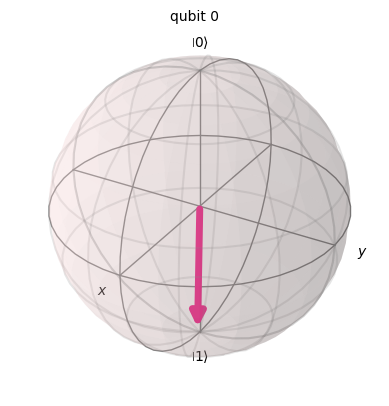

In [79]:
plot_bloch_multivector(partial_statevector)

Still don't understand how this protocol works? Well, here is an intuitive explanation for you:

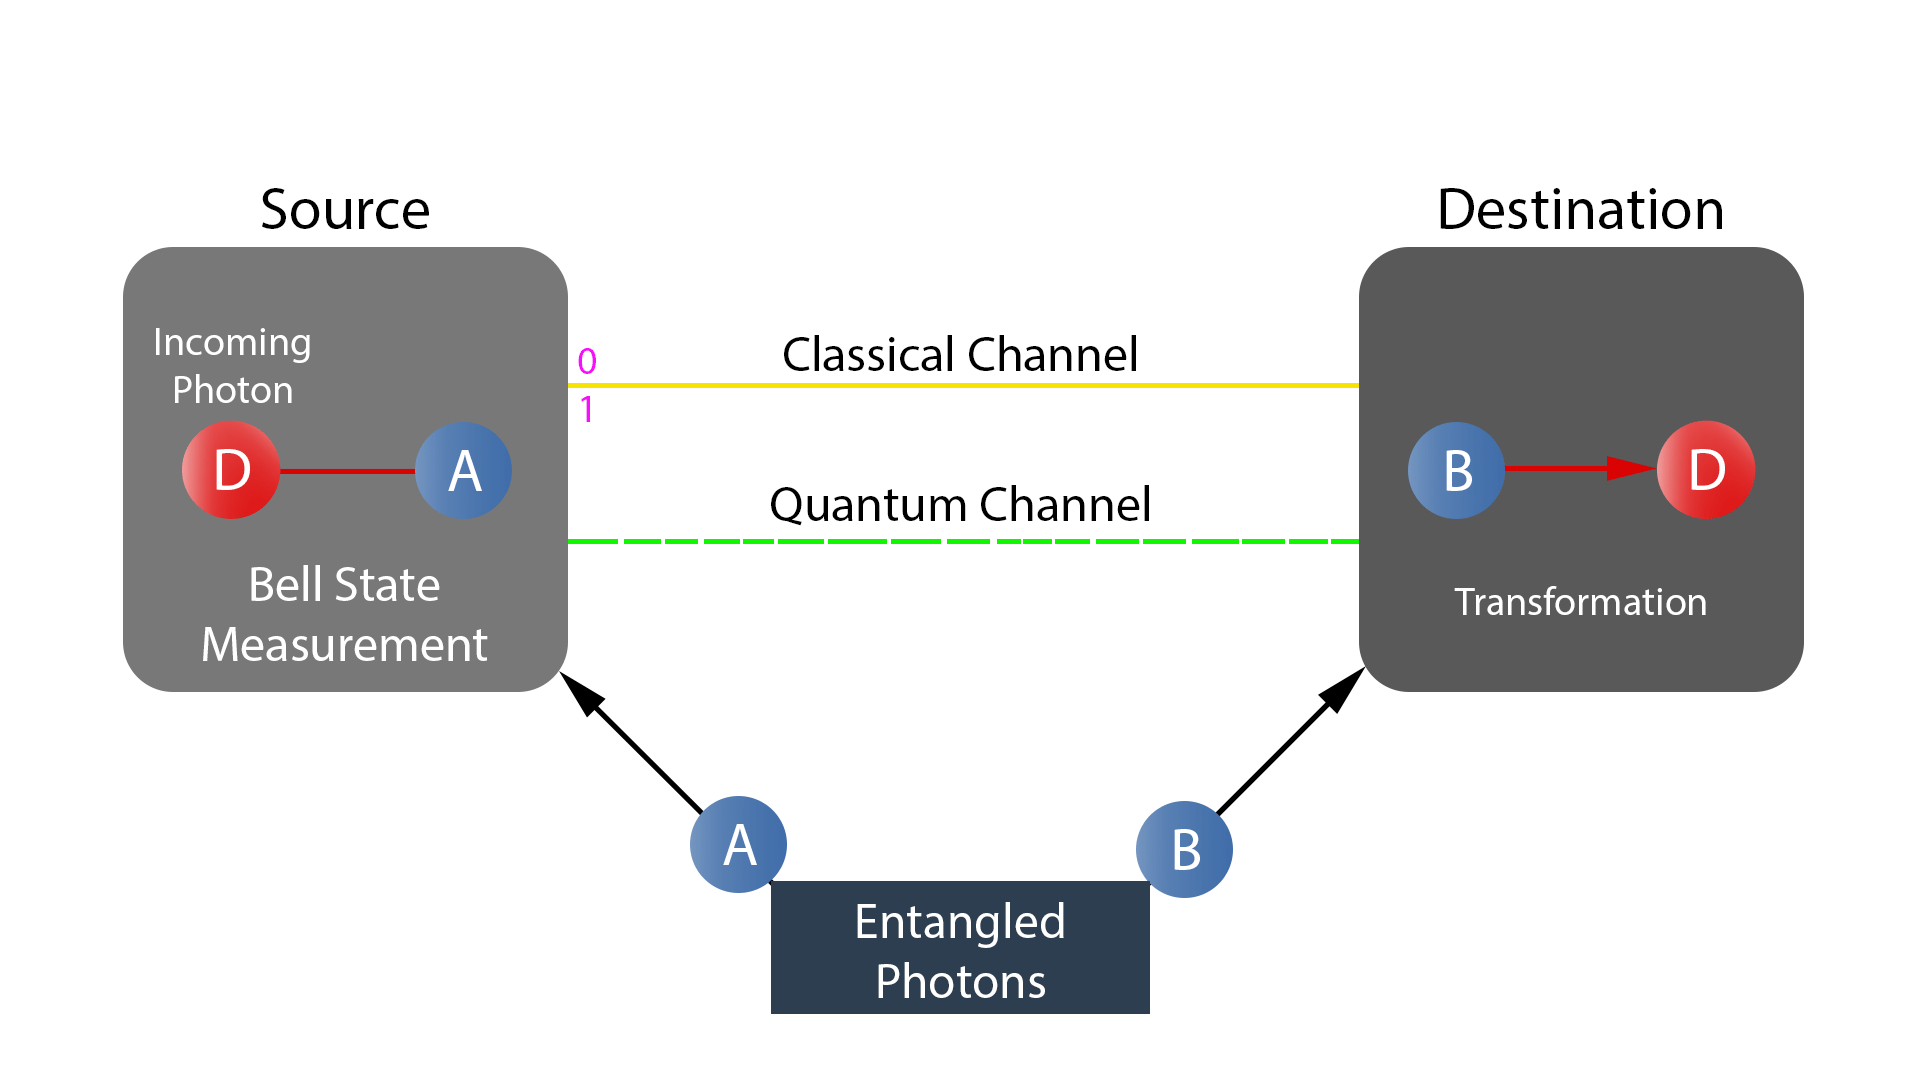



Source: https://medium.com/quantumcomputingnepal/quantum-teleportation-simplified-98a470b636a4

If you understand the quantum teleportation protocol now, you might have a couple of questions about the same. If not, let me ask them to you :)

1. As soon as Alice measured her state, a particular quantum state was created in Bob's qubit. Does this mean that Alice transmitted information to Bob faster than the speed of light?

2. After the teleportation protocol is complete, Bob has a copy of the state $|\psi\rangle$ that Alice wanted to send. Does not this mean that Alice has created a copy of the state she had, thus violating the no-cloning theorem?

Answer 1. No, Alice and Bob did not achieve faster than light communication because the protocol is completed only after Bob receives the two classical bits Alice sends through a classical communication channel. Once you learn a bit more about density matrices, you will formally be able to show that before learning the measurement outcome of Alice's measurement, no information (classical or quantum) has been transmitted to Bob. But for now, I hope this answer suffices!

Answer 2. No, Alice has not violated the no-cloning theorem, because as you might have noticed from your calculations, once Alice performs her measurement, she is only left with two classical bits of information, she no longer has a copy of the original state $|\psi\rangle$. This state has been destroyed at Alice's end, and recreated at Bob's end, it has not been copied!